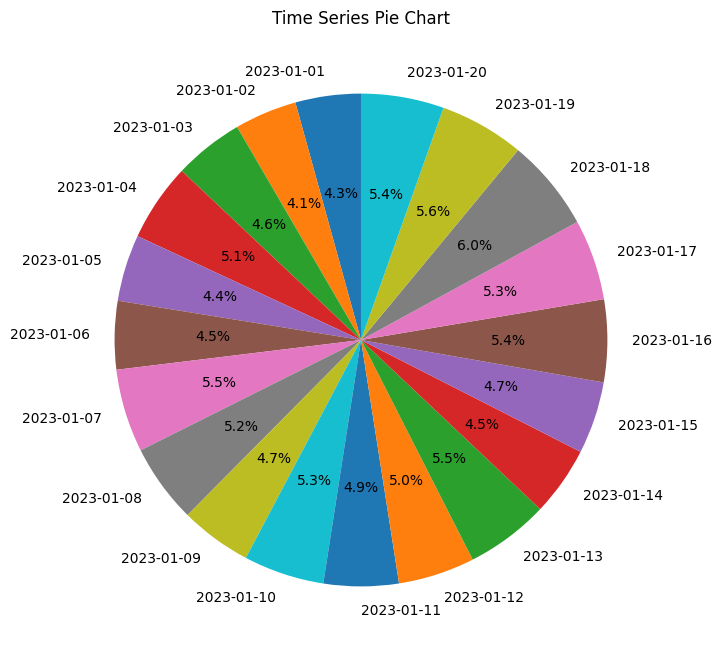

ADF Test on Original Series:
ADF Statistic: -1.0447518353849672
p-value: 0.7365943503611847
Critical Values: {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
The series is non-stationary.


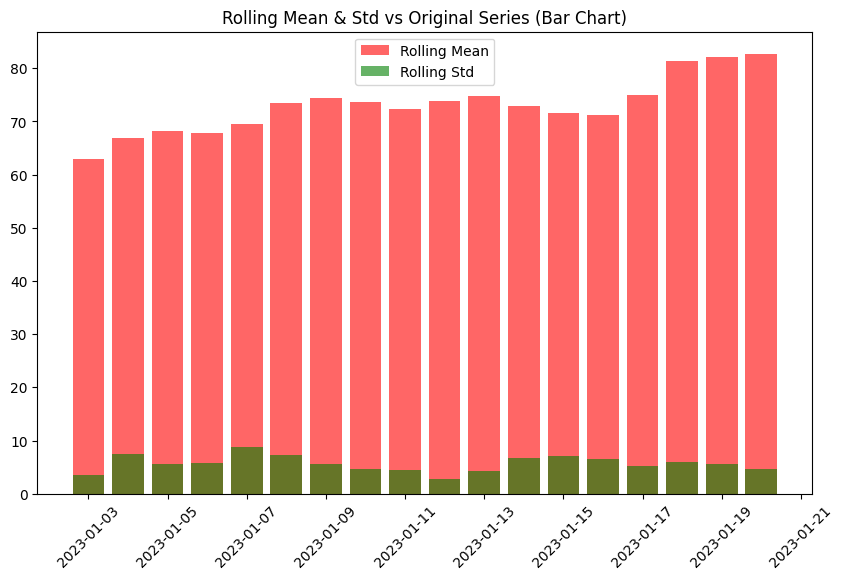

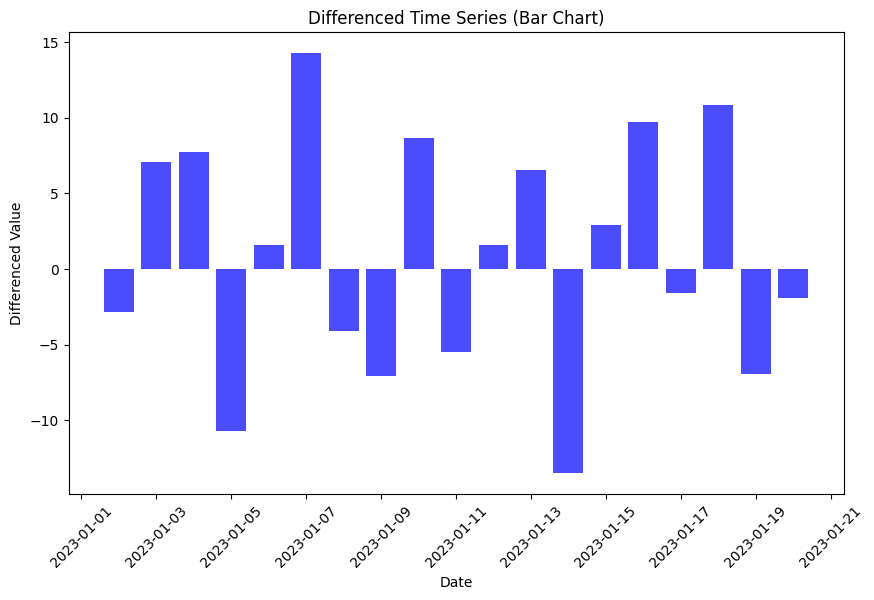

ADF Test on Differenced Series:
ADF Statistic: -3.430615466609437
p-value: 0.009958429295541266
Critical Values: {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}
The series is stationary.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

def generate_sample_data(n_points=20):
    """Generates a sample time series data."""
    np.random.seed(42)  # For reproducibility
    dates = pd.date_range(start='2023-01-01', periods=n_points, freq='D')
    # Generate a time series with a simple linear trend plus some random noise
    trend = np.linspace(55, 85, n_points)  # Linear trend from 50 to 100
    noise = np.random.normal(4, 7, n_points)  # Add some noise with mean=0 and std=5
    values = trend + noise
    data = pd.DataFrame({'date': dates, 'value': values})
    data.set_index('date', inplace=True)
    return data

def adf_test(series):
    """Performs the Augmented Dickey-Fuller test to check stationarity."""
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

def plot_time_series_pie(data):
    """Plots the time series data as a pie chart."""
    plt.figure(figsize=(8, 8))
    plt.pie(data, labels=data.index.strftime('%Y-%m-%d'), autopct='%1.1f%%', startangle=90)
    plt.title('Time Series Pie Chart')
    plt.show()

def plot_rolling_statistics_bar(data, window=12):
    """Plots rolling mean and rolling standard deviation as a bar chart."""
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    plt.figure(figsize=(10, 6))
    plt.bar(data.index, rolling_mean, color='red', alpha=0.6, label='Rolling Mean')
    plt.bar(data.index, rolling_std, color='green', alpha=0.6, label='Rolling Std')
    plt.title('Rolling Mean & Std vs Original Series (Bar Chart)')
    plt.legend(loc='best')
    plt.xticks(rotation=45)
    plt.show()

def differencing(data):
    """Applies differencing to the time series to make it stationary."""
    return data.diff().dropna()

def main():
    # Generate sample time series data with 20 data points
    data = generate_sample_data(n_points=20)

    # Visual Inspection (Plot the Time Series as Pie Chart)
    plot_time_series_pie(data['value'])

    # Perform Augmented Dickey-Fuller test
    print("ADF Test on Original Series:")
    adf_test(data['value'])

    # Rolling Statistics (Moving Average and Std as Bar Chart)
    plot_rolling_statistics_bar(data['value'], window=3)  # Use a smaller window for 20 data points

    # Differencing the Time Series to Achieve Stationarity
    data_diff = differencing(data['value'])

    # Plot the Differenced Time Series as a Bar Chart
    plt.figure(figsize=(10, 6))
    plt.bar(data_diff.index, data_diff, color='blue', alpha=0.7)
    plt.title('Differenced Time Series (Bar Chart)')
    plt.xlabel('Date')
    plt.ylabel('Differenced Value')
    plt.xticks(rotation=45)
    plt.show()

    # ADF Test on Differenced Series
    print("ADF Test on Differenced Series:")
    adf_test(data_diff)

if __name__ == '__main__':
    main()
